In [1]:
import numpy as np # import a package under an alias
import pandas as pd
from os import path
import urllib
import zipfile
from matplotlib import pyplot as plt
import sys
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score



In [2]:
# url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
# zipfilename = filename + '.zip'
# location = url + zipfilename
# if not path.isfile(zipfilename):
#     urllib.request.urlretrieve(location, zipfilename)
# zipfile.ZipFile(zipfilename).extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)


In [3]:
#1
print(f'number of lines with missing values is {df.isna().sum()}')
df.dropna(inplace=True) # drop all rows with any NaN and NaT values with axis=0 (rows) by default

number of lines with missing values is Date                      0
Time                      0
Global_active_power    3732
dtype: int64


In [4]:
#2)

#First of all we create a new column which\
#  contains time series information and (infer_datetime_format) reduce the time of calculation
df["DateTime"]=pd.to_datetime(df["Date"]+" "+df["Time"],infer_datetime_format=True)

#then we take just dateTime as index and our objective variable Global_active_power
df=df[["DateTime","Global_active_power"]].set_index("DateTime")

<AxesSubplot:title={'center':'daily averages'}>

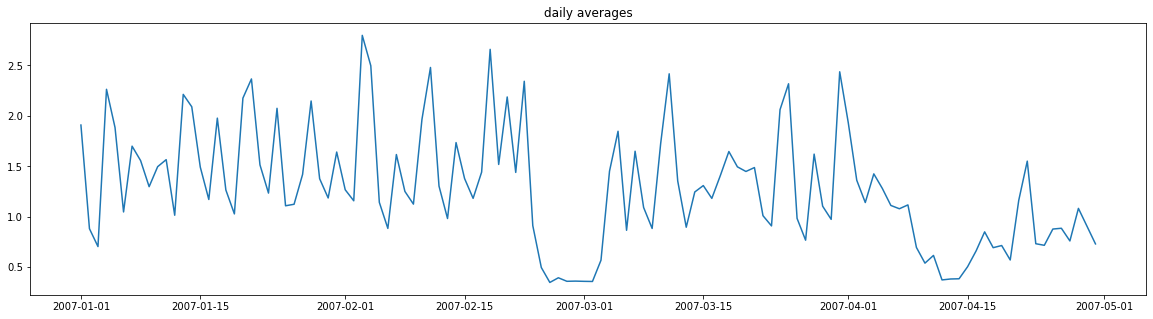

In [5]:
#3)

#we group by day and then we compute the mean then we plot it

df['2007-01-01':'2007-4-30']\
    .groupby(df['2007-01-01':'2007-4-30'].index.date)["Global_active_power"]\
        .mean()\
            .plot(kind="line",figsize=(20,5),title="daily averages")

#explanaation

In [6]:
#4)

# first get all lines from file
with open('TG_STAID011249.txt', 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.replace(' ', '') for line in lines]

# finally, write lines in the file
with open('TG_STAID011249.txt', 'w') as f:
    f.writelines(lines) 

In [7]:
#read txt file
na_values = ['?', '']
fields = ['TG',"DATE"]
dfTemp = pd.read_csv("TG_STAID011249.txt", sep=',',na_values=na_values, usecols=fields)

In [8]:
# dividing TG by 10 to get Celsius temerature
dfTemp['TG']=dfTemp["TG"]/10

# treating missing values

print(f'number of lines with missing values is\n {dfTemp.isna().sum()}')
dfTemp.dropna(inplace=True) # drop all rows with any NaN and NaT values with axis=0 (rows) by default

number of lines with missing values is
 DATE    0
TG      0
dtype: int64


In [9]:
#5)

#First of all we create make DATE column as time series \
#  and (infer_datetime_format) reduce the time of calculation
dfTemp["DATE"]=pd.to_datetime(dfTemp["DATE"], format='%Y%m%d')

#then we take just dateTime as index and our objective variable Global_active_power
dfTemp=dfTemp[["DATE","TG"]].set_index("DATE")

<AxesSubplot:>

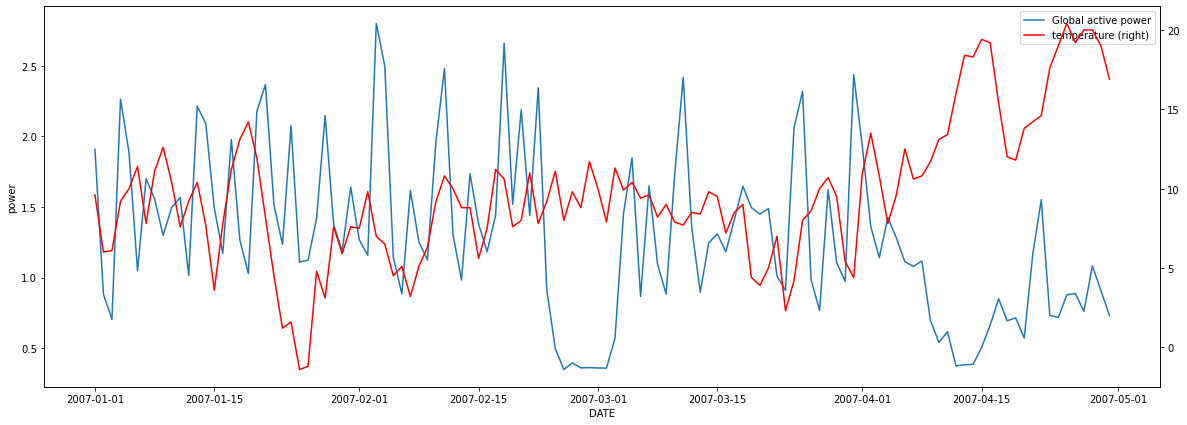

In [13]:
#we group by day and then we compute the mean then we plot it
df['2007-01-01':'2007-4-30']\
    .groupby(df['2007-01-01':'2007-4-30'].index.date)["Global_active_power"]\
        .mean()\
            .plot(kind="line",figsize=(20,7),label="Global active power",legend=True,stacked=True,ylabel="power")
dfTemp['2007-01-01':'2007-4-30']\
    .groupby(dfTemp['2007-01-01':'2007-4-30'].index.date)["TG"]\
        .mean()\
            .plot(kind="line",label="temperature",legend=True,color="red",secondary_y=True,xlabel="DATE")


## Exercice 5

In [ ]:
#16)

# first get all lines from file
with open('TG_STAID011249.txt', 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.replace(' ', '') for line in lines]

# finally, write lines in the file
with open('TG_STAID011249.txt', 'w') as f:
    f.writelines(lines) 

In [50]:
#16)

#read csv and precise the name of columns then we drop car_name
dfCars=pd.read_csv("auto-mpg.data-original",sep=r"\s+"\
    ,names=["mpg","cylinders","displacement","horsepower","weight"\
        ,"acceleration","model_year","origin","car_name"])\
            .drop(["car_name"],axis=1)
# treating missing values

print(f'number of lines with missing values is :\n{dfCars.isna().sum()}')
dfCars.dropna(inplace=True) # drop all rows with any NaN and NaT values with axis=0 (rows) by default

number of lines with missing values is :
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [91]:
#17)

#firstly we create a new data frame which is encoded to USA EUROPE AND JAPAN
encoded=pd.get_dummies(dfCars["origin"]).rename(columns={1: 'USA',2:"Europe",3:"Japan"})

#then we concatenate two dataframes
dfCars=pd.concat([dfCars, encoded], ignore_index=False,axis=1)

#finally we drop the origin column
dfCars.drop(["origin"],axis=1,inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,USA,Europe,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1,0,0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,0,1,0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1,0,0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1,0,0


In [163]:
# 18)

# 9 rows of the dataset such that all 3 origins are represented, and model year is not constant
selected_index=[] #empty list will contains indexes

#for loop to take 9 rows which contains different model_years and diferrent origins
for i in range(70,79,3):
    selected_index.append(dfCars[(dfCars["USA"]==1) & (dfCars["model_year"]==i)].index[0])
    selected_index.append(dfCars[(dfCars["Europe"]==1) & (dfCars["model_year"]==i+1)].index[0])
    selected_index.append(dfCars[(dfCars["Japan"]==1) & (dfCars["model_year"]==i+2)].index[0])

nineLines=dfCars.loc[pd.Index(selected_index)]

In [288]:
#18)

#we consider a linear regression
reg = linear_model.LinearRegression()
reg.fit(nineLines.drop("mpg",axis=1),nineLines["mpg"]) #we fit the model
pred=reg.predict(nineLines.drop("mpg",axis=1))
scores = cross_val_score(reg,nineLines.drop("mpg",axis=1),nineLines["mpg"], cv=3,scoring='neg_mean_squared_error')
print(f"The different scores obtained are: \n{scores}\n")
print(f"The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}\n")
print(f" the prediction of our model are {pred}\n")
print(f" the coefficients of our model are {reg.coef_}\n")
print(f" the intercept of our model is {reg.intercept_}\n")
print(f"we notice that the number of cylinders is the most significant variable with a coef of 2.4 , moreover the score had a big std so it's not stable and the mean cross validation is already big if we compare it to the max = {nineLines['mpg'].max()} ")

The different scores obtained are: 
[-8.05574868 -5.75688022 -6.61737685]

The mean cross-validation accuracy is: -6.810 +/- 0.948

 the prediction of our model are [18.  28.  24.  13.  29.  29.  25.  36.  32.8]

 the coefficients of our model are [ 2.39443589 -0.00378131 -0.03135941 -0.01048458 -0.73576005  1.18611355
 -1.50092069  1.90641539 -0.40549471]

 the intercept of our model is -31.877833806807914

we notice that the number of cylinders is the most significant variable with a coef of 2.4 , moreover the score had a big std so it's not stable and the mean cross validation is already big if we compare it to the max = 36.0 


In [215]:
#19)

model = make_pipeline(
    StandardScaler(),
    linear_model.LinearRegression()
)
from sklearn import set_config
set_config(display="text")

In [292]:
model.fit(dfCars.drop("mpg",axis=1),dfCars["mpg"]) #we fit the model
scores = cross_val_score(model,dfCars.drop("mpg",axis=1),dfCars["mpg"], cv=5,scoring='neg_mean_squared_error')
print(f"The different scores obtained are: \n{scores}\n")
print(f"The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}\n")
print(f" the coefficients of our model are {model[1].coef_}\n")
print(f" the intercept of our model is {model[1].intercept_}\n")
print(f"we notice that the most significant variables are displacement and model_year and weight\
, moreover we notice that the mean of cross validation\
is signifacally big (-15) comparing to the max of mpg variable = {dfCars.mpg.max()} ")

The different scores obtained are: 
[-14.97746131 -10.84730786  -6.36385927 -15.8149534  -27.50875617]

The mean cross-validation accuracy is: -15.102 +/- 7.056

 the coefficients of our model are [-0.83427197  2.50601874 -0.69900932 -5.69254264  0.21795599  2.85870923
 -0.75153855  0.40804774  0.52183015]

 the intercept of our model is 23.44591836734694

we notice that the most significant variables are displacement and model_year and weight, moreover we notice that the mean of cross validationis signifacally big (-15) comparing to the max of mpg variable = 46.6 


In [293]:
#20)

print(f"the prediction is {model.predict([[6,225,10,3233,15.4,2017,1,0,0]])[0]}")


the prediction is 1531.107352691827


C:\Users\zechc\.conda\envs\datacamp\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
